## Lesson 5 assignment
Robert Lisy

In [1]:
import pandas as pd
import numpy as np
import requests
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

filename = f"data/thyroid.csv"

# We're going to import the thyroid data set from UCI
# https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease
def download_if_not_exists(URL: str, filename: str):
    """
    Helper function to download the file at the URL if it doesn't already exist
    :param URL: A string with the URL location
    :param filename: The file name on disk
    """
    
    if path.exists(f"{filename}"):
        return
    else:
        req = requests.get(URL)
        url_content = req.content
        csv_file = open(f"{filename}", 'wb')
        csv_file.write(url_content)
        csv_file.close()
    return

download_if_not_exists("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data",
                      filename)
                        
# import the CSV as a data set
df = pd.read_csv(filename, header=None)
df.head()
df.shape

(3163, 26)

In [2]:
# now that we have the data frame, let's rename to sensible values
# names for this data set are here
# hypothyroid.names
colnames = {0 : 'hypothyroid', 1: 'age', 2: 'sex', 3:'on_thyroxine', 4:'query_on_thyroxine',
       5:'on_antithyroid_medication', 6:'thyroid_surgery', 7:'query_hypothyroid', 8:'query_hyperthyroid',
       9:'pregnant', 10:'sick', 11:'tumor', 12:'lithium', 13:'goitre', 14:'TSH_measured', 15:'TSH',
       16:'T3_measured', 17:'T3', 18:'TT4_measured', 19:'TT4', 20:'T4U_measured', 21:'T4U', 
       22:'FTI_measured', 23:'FTI', 24:'TBG_measured', 25:'TBG'}
            
            
df.rename(columns = colnames, inplace=True)
df.head()

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


### Data Cleaning and Conversion

In [3]:
# Convert some columns the their approperiate type
# and drop others (since I have no idea what they mean, and they're not necessary for the excercise)

# convert the categorical variables over to categories
category_list = ['hypothyroid', 'sex', 'on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
                'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured',
                 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
for col in category_list:
    df[col] = df[col].astype('category')
    
# convert numeric cols to numeric.
numeric_list = ['age', 'TSH', 'T3', 'TT4', 'T4U',
               'FTI', 'TBG']
for col in numeric_list:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Drop all these columns which start with 'query'
df = df.loc[:, ~df.columns.str.startswith('query')]

# Drop a few more columns as they're not necessary for the excercise
drops = ['T3_measured', 'T3', 'TT4_measured', 'TT4',
        'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
        'goitre', 'TBG_measured', 'TBG']

df = df.drop(drops, axis=1)

# Check output to see that the types are right.
df.dtypes

df

,hypothyroid,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,TSH_measured,TSH
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,y,30.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,y,145.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,y,430.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,y,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,y,5.8
3159,negative,29.0,F,f,f,f,f,f,f,f,y,0.8
3160,negative,77.0,M,f,f,f,f,f,f,f,y,1.2
3161,negative,74.0,F,f,f,f,f,f,f,f,y,1.3


0.0

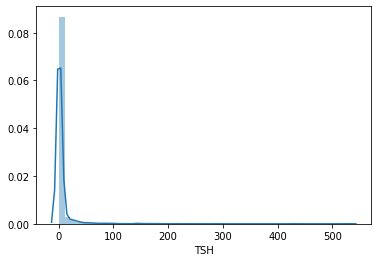

In [4]:
# Normalize numeric values (at least 1 column, but be consistent with other numeric data).
# Fill NAs with 0 as this would mean they haven't had a test.
df['TSH'] = df['TSH'].fillna(0)
sns.distplot(df['TSH']);
df['TSH'].min()

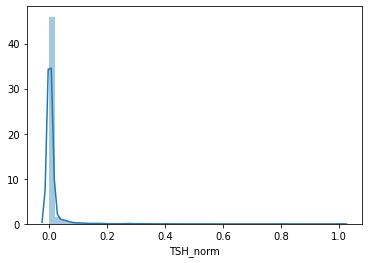

In [5]:
# Normalize the TSH column (I chose min/max normalization...)
df['TSH_norm'] = (df['TSH'] - df['TSH'].min()) / (df['TSH'].max() - df['TSH'].min())
sns.distplot(df['TSH_norm']);

In [6]:
# Bin numeric variables (at least 1 column).
# We'll bin ages, using a very non scientific classification.
bins = [0, 12, 22, np.inf]
names = ['Pediatric', 'Adolescent', 'Adult']

df['age_group'] = pd.cut(df['age'], bins, labels=names)
df['age_group'].value_counts()

Adult         2506
Adolescent     187
Pediatric       24
Name: age_group, dtype: int64

In [7]:
# "Decode" categorical data - During class Seth indicated that we should inspect the categories
# We'll look at 'hypothyroid', which is the outcome variable (or 'y')
for i in df.select_dtypes('category'):
    x = df[i].value_counts(dropna=False)
    print('------------------------')
    print(x)
    print('Number of categories: ' + str(len(x)))
    
# Looks like gender has unknown values in it ('?')
# Also looks like age_group now has NaN values

------------------------
negative       3012
hypothyroid     151
Name: hypothyroid, dtype: int64
Number of categories: 2
------------------------
F    2182
M     908
?      73
Name: sex, dtype: int64
Number of categories: 3
------------------------
f    2702
t     461
Name: on_thyroxine, dtype: int64
Number of categories: 2
------------------------
f    3121
t      42
Name: on_antithyroid_medication, dtype: int64
Number of categories: 2
------------------------
f    3059
t     104
Name: thyroid_surgery, dtype: int64
Number of categories: 2
------------------------
f    3100
t      63
Name: pregnant, dtype: int64
Number of categories: 2
------------------------
f    3064
t      99
Name: sick, dtype: int64
Number of categories: 2
------------------------
f    3123
t      40
Name: tumor, dtype: int64
Number of categories: 2
------------------------
f    3161
t       2
Name: lithium, dtype: int64
Number of categories: 2
------------------------
y    2695
n     468
Name: TSH_measured, dtype

In [8]:
# We'll consolidate down the age_group bin, so that the NaN values get grouped as adults
df['age_group'] = df['age_group'].replace({np.nan:'Adult'})
df['age_group'].value_counts()

Adult         2952
Adolescent     187
Pediatric       24
Name: age_group, dtype: int64

In [9]:
# One-hot encode the categorical columns
df_cats = df.select_dtypes('category').copy() # only select columns that have type 'category'
onehot = OneHotEncoder(sparse = False) # initialize one-hot-encoder
onehot.fit(df_cats)
col_names = onehot.get_feature_names(df_cats.columns) # this allows us to properly name columns
bank_onehot =  pd.DataFrame(onehot.transform(df_cats), columns = col_names)
bank_onehot.head()

,hypothyroid_hypothyroid,hypothyroid_negative,sex_?,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,TSH_measured_n,TSH_measured_y
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


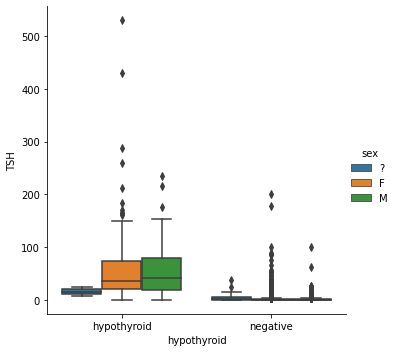

In [10]:
# Plot 1 or 2 categorical columns

# Plot TSH by gender and hypothyroid.
sns.catplot(x='hypothyroid', 
            y='TSH', 
            hue='sex',
            kind='box',
            data=df);

# It's ugly, but the medians of TSH show as clearly higher for hypothyroid (which we'd expect..)

(0.0, 15.0)

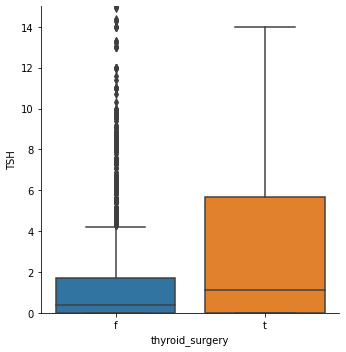

In [16]:
# Another plot...
sns.catplot(x='thyroid_surgery',
            y='TSH',
           kind='box',
           data=df);

# Set some y limits
plt.ylim(0, 15)

# Summary
- I've imported a data set from the UCI repository.
- I've take categorical variables (age) and turned them into a binned range (Adult, Pediatric, etc).
- Where age was not known, I mapped the age group of the patient to "Adult", because adults are the most common humans (probably). This consolidated down the number of age groups by 1.
- I've one-hot encoded all of the categorical variables.... because it's easy.